# Factor Graph

## Formulate SLAM as a Factor Graph
Factor graph is a nice representation for optimization problems:

$$
\begin{align}
\hat{X} =& \underset{X}{\operatorname{argmax}}\prod_i \Phi_i\\
=& \underset{X}{\operatorname{argmax}}\prod_i \phi_i(X, Z)
\end{align}
$$

A simple factor graph is shown below. Circles represent state variables, e.g robot poses, and squares represent constraints among variables, e.g. relative transformation. The corresponding optimization problem is:
$$
\begin{align}
\hat{X} =& \underset{X}{\operatorname{argmax}}\prod_{i=0}^3 \Phi_i\\
=& \underset{X}{\operatorname{argmax}}\phi_0(z_0; x_0, x_1)\phi_1(z_1; x_0, x_2)\phi_2(z_2; x_1, x_2)\phi_3(z_3; x_2)
\end{align}
$$
where $x$ are state variables to be optimized, and $z$ are observations related to states though a factor potential. 

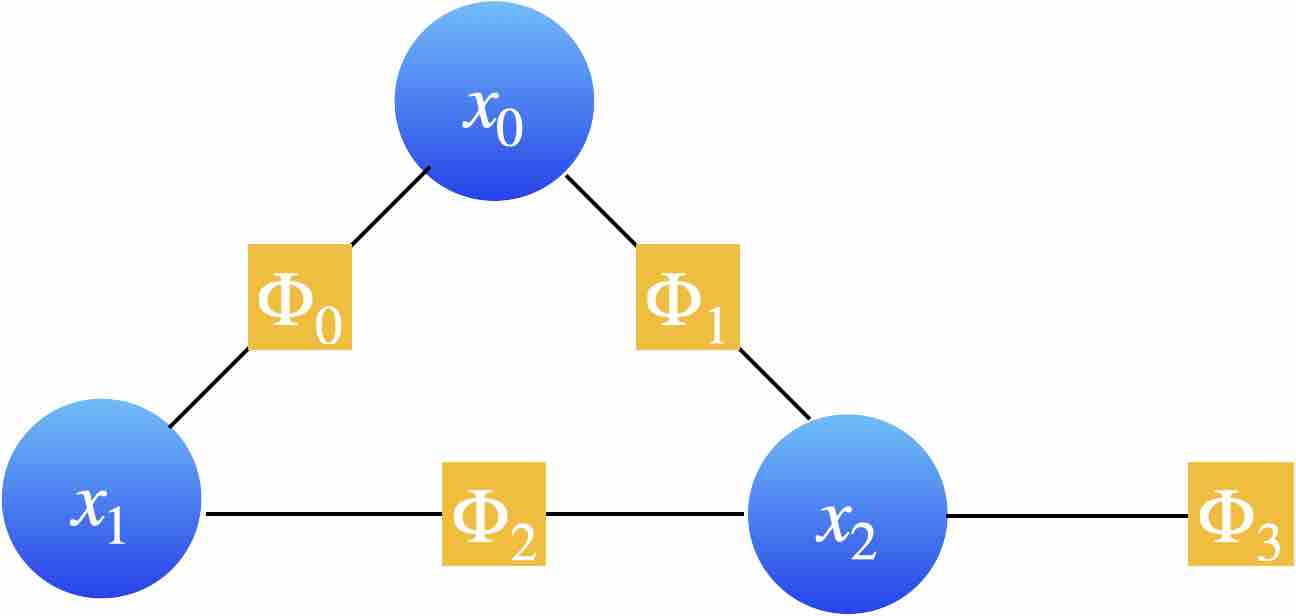

In [1]:
# A factor graph (e.g. a pose graph)
from IPython.display import Image
Image('img/simple-factor-graph.jpg', width=480)
#

Most of SLAM algorithms use probability distributions, e.g. Gaussian distribution, as factor potentials $\Phi$. For example, 
$$
\begin{align}
\hat{X} =& \underset{X}{\operatorname{argmax}}\prod_{i=0}^3 \Phi_i\\
=& \underset{X}{\operatorname{argmax}}\phi_0(z_0; x_0, x_1)\phi_1(z_1; x_0, x_2)\phi_2(z_2; x_1, x_2)\phi_3(z_3; x_2) \\
=& \underset{X}{\operatorname{argmax}} p_0(z_0; x_0, x_1)p_1(z_1; x_0, x_2)p_2(z_2; x_1, x_2)p_3(z_3; x_2) \\
\end{align}
$$

The formulation above can also be viewed as a MLE.
$$
\begin{align}
p(x_0,x_1,x_2,z_0,z_1,z_2,z_3) =& p(x_1,x_2,z_0,z_1,z_2,z_3|x_0) p(x_0) \\
=& p(x_2,z_0,z_1,z_2,z_3|x_1,x_0)p(x_1|x_0)p(x_0)\\
=& p(z_0,z_1,z_2,z_3|x_2, x_1,x_0)p(x_2|x_1, x_0)p(x_1)p(x_0)\\
=& p(z_1,z_2,z_3|z_0, x_2, x_1, x_0) p(z_0 | x_2, x_1, x_0)p(x_2)p(x_1)p(x_0)\\
=& p(z_1,z_2,z_3|z_0, x_2, x_1, x_0) p(z_0 |x_1, x_0)p(x_2)p(x_1)p(x_0) \\
=& p_0(z_0| x_0, x_1)p_1(z_1| x_0, x_2)p_2(z_2| x_1, x_2)p_3(z_3| x_2)p(x_2)p(x_1)p(x_0)\\
p(x_0,x_1,x_2,z_0,z_1,z_2,z_3) \propto& p_0(z_0| x_0, x_1)p_1(z_1| x_0, x_2)p_2(z_2| x_1, x_2)p_3(z_3| x_2)
\end{align}
$$

Then 
$$
\begin{align}
\hat{X} =& \underset{X}{\operatorname{argmax}}p(x_0,x_1,x_2,z_0,z_1,z_2,z_3)\\
=& \underset{X}{\operatorname{argmax}}p_0(z_0| x_0, x_1)p_1(z_1| x_0, x_2)p_2(z_2| x_1, x_2)p_3(z_3| x_2) \\
\end{align}
$$

If we assume the factor potentials are Gaussian distribution whose mean is the residual between observation and prediction based on potential function, then the factor graph can be converted to be a least square problem. For converting non-Gaussian distribution into least square problems, see [Mixture models for least square optimization]({% post_url 2021-05-11-paper-reading-mixture-models-for-least-square-optimization %}).

$$
\begin{align}
\hat{X} =& \underset{X}{\operatorname{argmax}}\prod_{i=0}^3 \Phi_i\\
=& \underset{X}{\operatorname{argmax}}\phi_0(z_0; x_0, x_1)\phi_1(z_1; x_0, x_2)\phi_2(z_2; x_1, x_2)\phi_3(z_3; x_2) \\
=& \underset{X}{\operatorname{argmax}} p_0(z_0; x_0, x_1)p_1(z_1; x_0, x_2)p_2(z_2; x_1, x_2)p_3(z_3; x_2) \\
=& \underset{X}{\operatorname{argmax}} \mathcal{N}(z_0-f_0(x_0, x_1), \Sigma_0)
\mathcal{N}(z_1-f_1(x_0, x_2), \Sigma_1) \mathcal{N}(z_2-f_2(x_1, x_2), \Sigma_2)\mathcal{N}(z_3-f_3(x_2), \Sigma_3)\\
\propto& \underset{X}{\operatorname{argmax}} log(\mathcal{N}(z_0-f_0(x_0, x_1), \Sigma_0)
\mathcal{N}(z_1-f_1(x_0, x_2), \Sigma_1) \mathcal{N}(z_2-f_2(x_1, x_2), \Sigma_2)\mathcal{N}(z_3-f_3(x_2), \Sigma_3)\\
=& \underset{X}{\operatorname{argmax}} \|z_0-f_0(x_0, x_1)\|^2_{\Sigma_0} + \|z_1-f_1(x_0, x_2)\|^2_{\Sigma_1} + \|z_2-f_2(x_1, x_2)\|^2_{\Sigma_2} + \|z_3-f_3(x_2)\|^2_{\Sigma_3}
\end{align}
$$

## Gauss-Newton Optimization

Gauss-Newton is an iterative optimization method which tries approaching the minima (maybe a local minima) step by step. It linearize the non-linear functions $f$ based on first-order Taylor expansion.

$$
\begin{align}
\hat{X} =& \underset{X}{\operatorname{argmax}} \|z_0-f_0(x_0, x_1)\|^2_{\Sigma_0} + \|z_1-f_1(x_0, x_2)\|^2_{\Sigma_1} + \|z_2-f_2(x_0, x_1)\|^2_{\Sigma_2} + \|z_3-f_3(x_2)\|^2_{\Sigma_3}\\
=& \|z_0-f_0(\mu_0, \mu_1) - J_0 \Delta_{x_0, x_1}\|^2_{\Sigma_0} + 
\|z_1-f_0(\mu_0, \mu_2) - J_1 \Delta_{x_0, x_1}\|^2_{\Sigma_1} + 
\|z_2-f_0(\mu_0, \mu_1) - J_2 \Delta_{x_1, x_2}\|^2_{\Sigma_2} + 
\|z_3-f_0(\mu_0, \mu_1) - J_3 \Delta_{x_3}\|^2_{\Sigma_3}
\end{align}
$$

Where $J$ is a jacobian matrix.

The above equation can be written into a more compact matrix form:
$$
\begin{align}
\hat{X} =& \underset{X}{\operatorname{argmax}} \|J\Delta_X - r\|_{\Sigma}
\end{align}
$$

J is normally a tall rectangular matrix. And the number of rows of J is equal to the number of measurements.

Without considering the numeric stability, the above linear optimization problem is usually solved using Cholesky decomposition on $J^T \Sigma J$.  

$$
\begin{align}
J^T \Sigma^{-1} J \hat{X} = J^T\Sigma^{-1} r
\end{align}
$$

In practice, $A = J^T \Sigma J$ and $b = J^T\Sigma r$ are generated based on local blocks. And $J^T \Sigma J$ is usually a sparse matrix in SLAM problems. 

$A$ is a square matrix which has the same number of rows as the number of node states. So in the toy example above, if $x \in \mathbb{R}^k$, then $A$ has $3 \times k$ rows. 

The block $\|z_0-f_0(\mu_0, \mu_1) - J_0 \Delta_{x_0, x_1}\|^2_{\Sigma_0}$ will give non-zeros fillings for rows and columns corresponding to state $x_0$ and $x_1$. if $z_0 \in \mathbb{R}^l $, then $J_0$ is a $l \times 2k$ matrix. $J_0^T \Sigma_0 J_0$ will be $2k \times 2k$ which will be filled into rows and columns corresponding to state $x_0$ and $x_1$. If you would want to break it down further:

$$
\begin{align}
\begin{bmatrix} J_{x_0}^T \\ J_{x_1}^T \end{bmatrix} \Sigma^{-1} \begin{bmatrix} J_{x_0}, J_{x_1} \end{bmatrix} \hat{X} = \begin{bmatrix} J_{x_0}^T \\ J_{x_1}^T \end{bmatrix} \Sigma^{-1} r
\end{align}
$$

## Cholesky Factorization

$$
\begin{align}
Ax = b \\
R^T Rx = b
\end{align}
$$
$R$ is a upper triangular matrix. Then $R^{T}Rx = b$ will be solved in two steps: 1)
solve the lower triangular system $R^{T}y = b$; 2) solve the upper triangular
system $Rx = y$.

Given a $3 \times 3$ matrix $A$ factorized to be $R^{T}R$:
$$
\begin{align}
A = R^{T}R & =
\left[\begin{matrix}   R_{11} & 0 & 0 \\
   R_{12} & R_{22} & 0 \\
   R_{13} & R_{23} & R_{33}\\
\end{matrix}\right]
\left[\begin{matrix}   R_{11} & R_{12} & R_{13} \\
   0 & R_{22} & R_{23} \\
   0 & 0 & R_{33}
\end{matrix} \right]\\
& =
\left[\begin{matrix}   R_{11}^2 &  R_{11}R_{12} & R_{11}R_{13}  \\
   R_{12}R_{11} & R_{12}^2 + R_{22}^2&  R_{12}R_{13}+R_{22}R_{23} \\
   R_{13}R_{11} & R_{13}R_{12}+R_{23}R_{22} & R_{13}^2 + R_{23}^2+R_{33}^2
\end{matrix}\right]
\end{align}
$$

We obtain the following:

\begin{align}
R =
\left[\begin{matrix} \sqrt{A_{11}} &  \frac{A_{12}}{R_{11}} & \frac{A_{13}}{R_{11}}  \\
0 & \sqrt{A_{22} - R_{12}^2} & \frac{ A_{23} - R_{12}R_{13}}{R_{22}} \\
0 & 0   & \sqrt{A_{33}- R_{13}^2 - R_{23}^2}
\end{matrix}\right]
\end{align}

Therefore we can get following formulae for the entries of $R$ ($i$ is row index
and $j$ is the column index). The whole Cholesky decomposition process is done row by row.
$$
\begin{align}
\begin{split}
R_{i,i} &= \sqrt{ A_{i,i} - \sum_{k=1}^{i-1} R_{k,i}^2 } \\
R_{i,j} &= \frac{1}{R_{i,i}} \left( A_{i,j} - \sum_{k=1}^{i-1} R_{k,i} R_{k,j} \right) \quad j > i.
\end{split}
\end{align}
$$

Another way to think about Cholesky decomposition is that a non-zero element at row $i$ column $j$ ($j > i$) will contribute a non-zeros fillings to row $j$ later.
$$
\begin{align}
\begin{split}
R_{i,i} &= \sqrt{ A_{i,i} - \sum_{k=1}^{i-1} R_{k,i}^2 } \\
R_{i,j:} &= \frac{1}{R_{i,j:}} \left( A_{i,j} - \sum_{k=1}^{i-1} R_{k,i} R_{k,j:} \right) \quad j > i.
\end{split}
\end{align}
$$

In [2]:
# Cholesky decomposition

import numpy as np
A = np.array([[1, 0.5, 0.4],
              [0.5, 1, 0.2],
              [0.4, 0.2, 2]])
b = np.array([1,2,1])
x = np.linalg.solve(A, b)
L = np.linalg.cholesky(A)
print(f'Solve linear equation using numpy linear solver: \n {x}')
print(f'Cholesky Decomposition: \n {L.T}')

def Cholesky(A):
    nrows, ncols = A.shape
    assert(nrows == ncols)
    R = np.zeros(A.shape)
    for i in range(nrows):
        R[i, i:] = A[i, i:]
        
    for i in range(nrows):
        row_i = R[i, :]
        d = row_i[i]
        d = np.sqrt(d)
        row_i /= d
        for j in range(i+1, ncols):
            s = row_i[j]
            if s == 0:
                continue
            row_j = R[j, :]
            row_j[j:] -= s*row_i[j:]
    return R


def SolveUpperTriangular(R, y):
    nrows, ncols = R.shape
    x = np.zeros(y.shape).reshape(nrows)
    for inv_i in range(0, nrows):
        i = nrows - inv_i - 1
        row_i = R[i, :]
        y_i = y[i]
        for j in range(i+1, nrows):
            y_i -= x[j]*row_i[j]
        x[i] = y_i / row_i[i]
    return x
        
    
def SolveLowerTriangular(R, b):
    nrows, ncols = R.shape
    y = np.zeros(nrows)
    y[:] = b[:]
    for i in range(0, nrows):
        row_i = R[i, :]
        y[i] /= row_i[i]
        for j in range(i+1, ncols):
            s = row_i[j]
            if s == 0:
                continue
            y[j] -= y[i]*s
    return y



R = Cholesky(A)
y = SolveLowerTriangular(R, b)

x = SolveUpperTriangular(R, y)
print(f' \n \nSolution x impl: \n {x}')
print(f'Cholesky Decomposition impl: \n {R}')

#

Solve linear equation using numpy linear solver: 
 [-0.13043478  2.          0.32608696]
Cholesky Decomposition: 
 [[1.        0.5       0.4      ]
 [0.        0.8660254 0.       ]
 [0.        0.        1.356466 ]]
 
 
Solution x impl: 
 [-0.13043478  2.          0.32608696]
Cholesky Decomposition impl: 
 [[1.        0.5       0.4      ]
 [0.        0.8660254 0.       ]
 [0.        0.        1.356466 ]]


## Covariance and Factor Contribution

We have 
$$
\begin{align}
A \Delta x = b \\
\end{align}
$$
Where $A = J^T \Sigma^{-1} J$ and $b = J^T \Sigma^{-1} r$. So the uncertianty of the solution $\Delta x$ is $A^{-1}$.

Among many measurements, how do we know which one affect a particular state most? 

From above, we have:
$$
\begin{align}
\Delta x = A^{-1} * J^T * \Sigma^{-1} * r 
\end{align}
$$

then assume we have $n$ states and $m$ measurements:

$$
\begin{align}
\begin{bmatrix}
\Delta X_0 \\
\vdots \\
\Delta X_n
\end{bmatrix} = 
\begin{bmatrix}
\Sigma_{X_0,X_0} & \cdots & \Sigma_{X_n0, X_n} \\
\vdots & \cdots & \vdots \\
\Sigma_{X_n,X_0} & \cdots & \Sigma_{X_n, X_n}
\end{bmatrix} \begin{bmatrix}
J^{z_0}_{x_0} & \cdots & J^{z_m}_{x_n} \\
\vdots & \cdots & \vdots \\
J^{z_m}_{x_0} & \cdots & J^{z_m}_{x_n}
\end{bmatrix} ^T
\begin{bmatrix}
\Sigma^{-1}_{z_0}, 0, \cdots, 0 \\
0, \Sigma^{-1}_{z_1}, \cdots, 0 \\
\vdots, \cdots , \cdots, \vdots \\
0, \cdots, 0, \Sigma^{-1}_{z_n}
\end{bmatrix} 
\begin{bmatrix}
r_0 \\
\vdots \\
r_m \\
\end{bmatrix}
\end{align}
$$

Now, the constribution of $z_0$ towards $\Delta_X$ can be calculated as $ (\Sigma_{X_n, X_0}J_{x_0}^{z_0} + \cdots + \Sigma_{X_n, X_n}J_{x_n}^{z_0})*(\Sigma^{-1}_{z_0}r_0)$ 

In [36]:
# Covariance and factor contribution

import numpy as np
# Robot position
x = 0 

# Robot position measurements and variance

z0 = 0.1
s0 = 1
r0 = z0 - x

z1 = 0.14
s1 = 0.1
r1 = z1 - x

z2 = -0.11
s2 = 0.01
r2 = z2 - x

z3 = 0.13
s3 = 1
r3 = z3 - x

J = np.array([1, 1, 1, 1]).reshape(4, 1)
J_transpose = J.T
S = np.diag([1.0/s0, 1.0/s1, 1.0/s2, 1.0/s3])
r = np.array([r0, r1, r2, r3]).reshape(4, 1)

A = J_transpose.dot(S).dot(J)
print(f"{A=}")
A_inv = np.linalg.inv(A)
print(f"{A_inv}")
b = J_transpose.dot(S).dot(r)
print(f"{b=}")

delta_x = A_inv.dot(b)
print(f"{A_inv.dot(b)}=")

new_x = x + delta_x
print(f"{new_x=}")

# r0 contribution to x
c0 = A_inv[0, :] @ J_transpose[:, 0] * S[0, 0] * r0

c1 = A_inv[0, :] @ J_transpose[:, 1] * S[1, 1] * r1
c2 = A_inv[0, :] @ J_transpose[:, 2] * S[2, 2] * r2
c3 = A_inv[0, :] @ J_transpose[:, 3] * S[3, 3] * r3

print(f"{c0=:.4f}, {c1=:.4f}, {c2=:.4f}, {c3=:.4f}")

print(f"{c0 + c1 + c2 + c3=:.4f}")
print(f"{delta_x.item()=:.4f}")
#

A=array([[112.]])
[[0.00892857]]
b=array([[-9.37]])
[[-0.08366071]]=
new_x=array([[-0.08366071]])
c0=0.0009, c1=0.0125, c2=-0.0982, c3=0.0012
c0 + c1 + c2 + c3=-0.0837
delta_x.item()=-0.0837


## Incremental Cholesky Factorization

If you follows the Cholesky factorization described from above section, you may notice that we could easily reconstruct $R$ in intermediate steps. Mathematically, 

$$
\begin{align}
  A =
  \begin{bmatrix}
    A_{00} & A_{01} \\
    A_{10} & A_{11}
  \end{bmatrix} \\
  R =
  \begin{bmatrix}
    R_{00} & R_{01} \\
    \textbf{0} & R_{11}
  \end{bmatrix}
\end{align}
$$

An intermediate matrix $R^{in}$ of the decomposition process has the form
$$
\begin{align}
  R^{in} =
  \begin{bmatrix}
    R_{00} & R_{01} \\
    \textbf{0} & A_{11}^{in}
  \end{bmatrix}
\end{align}
$$
where $A_{11}^{in}$ is the filled-in version of submatrix $A_{11}$ resulting
from the partial factorization. Given the completed factorization $R$, we can
compute $A_{11}^{in}$ as
$$
\begin{align}
  A_{11}^{in}=R_{11}^T R_{11}
\end{align}
$$
This in turn allows us to reconstruct the intermediate matrix $R^{in}$.



Let $\tilde{A}$ be the evolved version of $A$ following the addition of new
information. This update only affects a portion $A_{11}$ of the information
matrix, with corresponding effects to $R_{11}$ in the factorization. That is,
the new information matrix $\tilde{A}$ and its factorization matrix $\tilde{R}$
have the forms:
$$
\begin{align}
  \label{aprilsam:eq:updated-information-factorization-forms}
  \tilde{A} =
  \begin{bmatrix}
    A_{00} & A_{01} \\
    A_{10} & A_{11} + A_{new}
  \end{bmatrix} \ \
  \tilde{R}=
  \begin{bmatrix}
    R_{00} & R_{01} \\
    \textbf{0} & \tilde{R}_{11}
  \end{bmatrix}
\end{align}
$$
Because $\tilde{A}=\tilde{R}^T\tilde{R}$, we can express the updated portion of
the information matrix as

$$
\begin{align}
  \tilde{R}_{11}^T\tilde{R}_{11} = A_{11}^{in} + A_{new}
\end{align}
$$
Then we can do a reconstruction following with a Cholesky decomposition.
$$
\begin{align}
  \tilde{R}_{11}^T\tilde{R}_{11} &= R_{11}^TR_{11} + A_{new}
\end{align}
$$




**Note: This incremental process assumes that the linearization points stay the same.** 

In [128]:
# Incremental Cholesky Decomposition

def CholeskyReconstructA(R_, stop_row_id):
    R = R_.copy()
    nrows, ncols = R.shape
    for i in range(nrows-1, stop_row_id-1, -1):
        row_i = R[i, :]
        d = row_i[i]
        for j in range(ncols):
            s = row_i[j]
            if s == 0:
                continue
            if j > i:
                row_j = R[j, :]
                row_j[j:] += s*row_i[j:]
        row_i[i] *= d
    return R

def CholeskyInc(R_, start_row_id):
    nrows, ncols = R_.shape
    assert(nrows == ncols)
    R = R_.copy()
    for i in range(start_row_id, nrows):
        row_i = R[i, :]
        d = row_i[i]
        d = np.sqrt(d)
        row_i /= d
        for j in range(ncols):
            s = row_i[j]
            if s == 0:
                continue
            if j > i:
                row_j = R[j, :]
                row_j[j:] -= s*row_i[j:]
    return R

def CholeskyReconstruct_y(R, y_, stop_row_id):
    nrows, ncols = R.shape
    y = np.zeros(nrows)
    y = y_.copy()
    for i in range(nrows-1, stop_row_id-1, -1):
        row_i = R[i, :]
        for j in range(i+1, ncols):
            s = row_i[j]
            if s == 0:
                continue
            y[j] += y[i]*s
        y[i] *= row_i[i]
    return y

def SolveLowerTriangularInc(R, y_, start_row_id):
    nrows, ncols = R.shape
    y = y_.copy()
    for i in range(start_row_id, nrows):
        row_i = R[i, :]
        y[i] /= row_i[i]
        for j in range(i+1, ncols):
            s = row_i[j]
            if s == 0:
                continue
            y[j] -= y[i]*s
    return y



print(f'original A: \n {A}')
R = Cholesky(A)
reconstruct_A = CholeskyReconstructA(R, 0)
print(f'Reconstructed A: \n {reconstruct_A} \n')

print(f'original R: \n {R}')
test_row_id = 2
reconstruct_partial_A = CholeskyReconstructA(R, test_row_id)
inc_R = CholeskyInc(reconstruct_partial_A, test_row_id)
print(f'Inc R: \n {inc_R}')

print(f'original y: \n {y}')
test_row_id = 2
reconstruct_partial_y = CholeskyReconstruct_y(R, y, test_row_id)
inc_y = SolveLowerTriangularInc(R, reconstruct_partial_y, test_row_id)
print(f'Inc y: \n {inc_y}')

#

original A: 
 [[1.  0.5 0.4]
 [0.5 1.  0.2]
 [0.4 0.2 2. ]]
Reconstructed A: 
 [[1.  0.5 0.4]
 [0.  1.  0.2]
 [0.  0.  2. ]] 

original R: 
 [[1.        0.5       0.4      ]
 [0.        0.8660254 0.       ]
 [0.        0.        1.356466 ]]
Inc R: 
 [[1.        0.5       0.4      ]
 [0.        0.8660254 0.       ]
 [0.        0.        1.356466 ]]
original y: 
 [1.         1.73205081 0.44232587]
Inc y: 
 [1.         1.73205081 0.44232587]


## Incremental Smoothing and Mapping

### Variable Ordering for Cholesky Decomposition

### Incremental Mapping for Odometry Backbone

### Incremental Mapping for Loop Closure

### iSAM, iSAM2 and AprilSAM

Reference:

1. Wang, High Availability Mapping and Localization
2. Dellaert, Factor Graphs for Robot Perception